In [18]:
import numpy as np
import scipy.linalg as splin
from scipy.integrate import LSODA, solve_ivp
import matplotlib.pyplot as plt

from consts import *
from lyapunov import *
from pac import *
from potential import *

In [19]:
# Initial conditions (alpha0) and Jacobi interval
alpha0 = 50/384400 # initial guess for alpha

# C = 2U(r) - (vx^2 + vy^2)
C_range = [3.1370, 3.1493]

# Initialize list of families
L1_family = []


In [20]:
# Compute non-linear orbit from alpha0
Yd0, DF, FX = nonlin_lyapunov_orbit(XL1, mu, alpha0) #1
L1_family.append(Yd0)
Yd1, DF1, FX1 = PAC(Yd0, DF, mu) #2
L1_family.append(Yd1)
Yd2, DF2, FX2 = PAC(Yd1, DF1, mu) #3
L1_family.append(Yd2)


Shooting converged at: 
 [[0.83658071]
 [0.00304914]
 [2.69178148]] 
 that satisfies the constraint with accuracy: 
 [[-1.05333121e-15]
 [ 9.06480006e-15]]


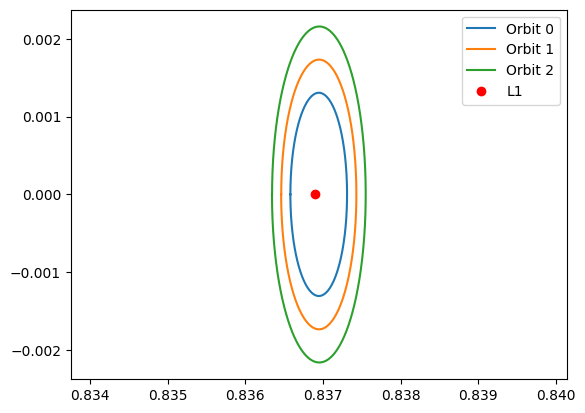

In [21]:
# Plot all the orbits contained in the family
for i in range(len(L1_family)):
    Y, PHI = compute_orbit_Yd(L1_family[i], mu)
    plt.plot(Y[0,:], Y[1,:], label='Orbit %d' % i)

# Plot the Lagrange point
plt.plot([XL1[0]], [XL1[1]], 'ro', label='L1')

plt.axis('equal')
plt.legend()
plt.show()

In [22]:
# Same ol shit for L2
L2_family = []

# Compute non-linear orbit from alpha0
Yd0_L2, DF_L2, FX_L2 = nonlin_lyapunov_orbit(XL2, mu, alpha0) #1
L2_family.append(Yd0_L2) 
# PAC
Yd1_L2, DF1_L2, FX1_L2 = PAC(Yd0_L2, DF_L2, mu) #2
L2_family.append(Yd1_L2)
Yd2_L2, DF2_L2, FX2_L2 = PAC(Yd1_L2, DF1_L2, mu) #3
L2_family.append(Yd2_L2)

Shooting converged at: 
 [[1.15442965]
 [0.00664386]
 [3.37349234]] 
 that satisfies the constraint with accuracy: 
 [[-1.12238417e-15]
 [-7.66573175e-15]]


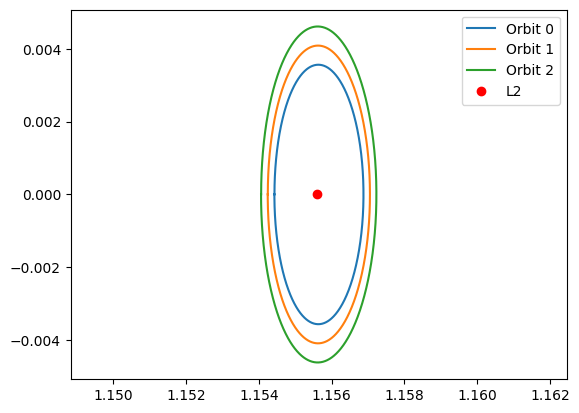

In [23]:
# Plot all the orbits contained in the family
for i in range(len(L2_family)):
    Y, PHI = compute_orbit_Yd(L2_family[i], mu)
    plt.plot(Y[0,:], Y[1,:], label='Orbit %d' % i)

# Plot the Lagrange point
plt.plot([XL2[0]], [XL2[1]], 'ro', label='L2')

plt.axis('equal')
plt.legend()
plt.show()